<h1> Up to 3 photons! </h1>

Let's have a look at the data and how the network performs.

In [1]:
# own skrips
import helperfile5 as hf
# generalls libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import uproot
from tensorflow.keras.optimizers import Adam
import time
import datetime
from scipy.optimize import curve_fit
from matplotlib.colors import LogNorm
from uncertainties import unumpy as unp
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
rootfile3 = uproot.open('./stage5_clusters_3gamma.root')
ipd3 = hf.InputData(rootfile3, 3, numevents=100000)
ipd3.train_test_split()

Loaded data
Formed cluster
Splitted data into training and test set!


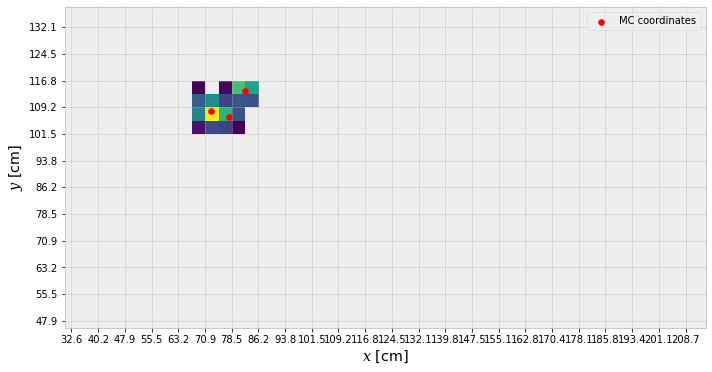

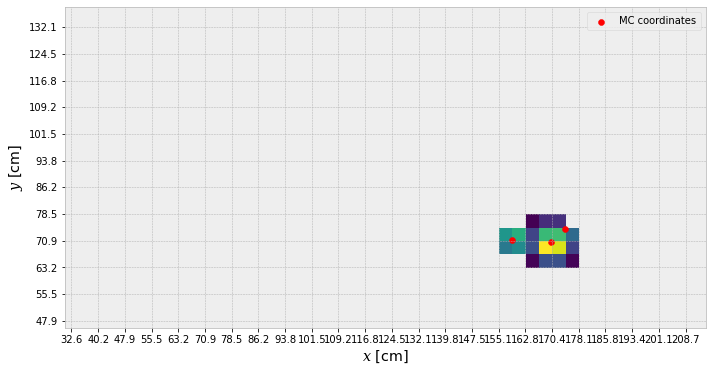

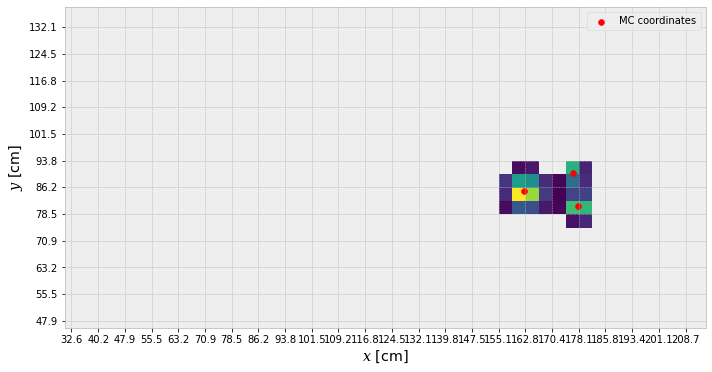

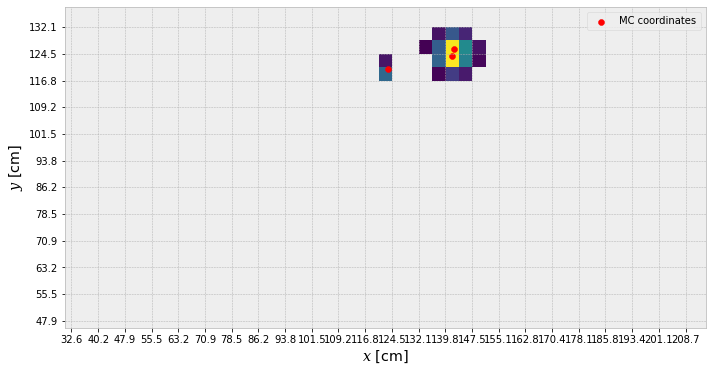

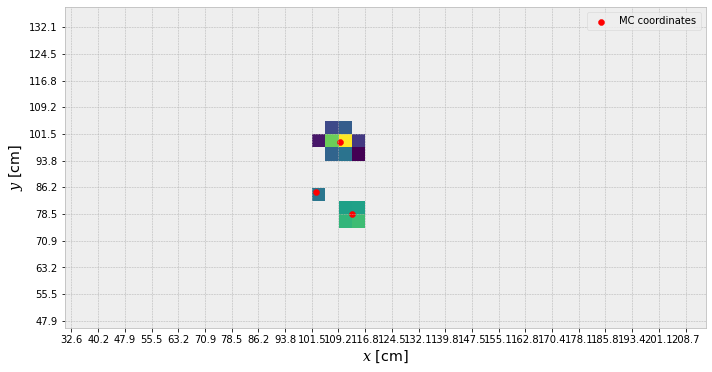

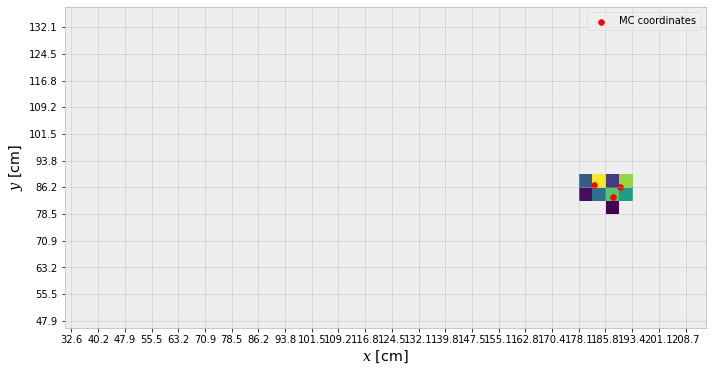

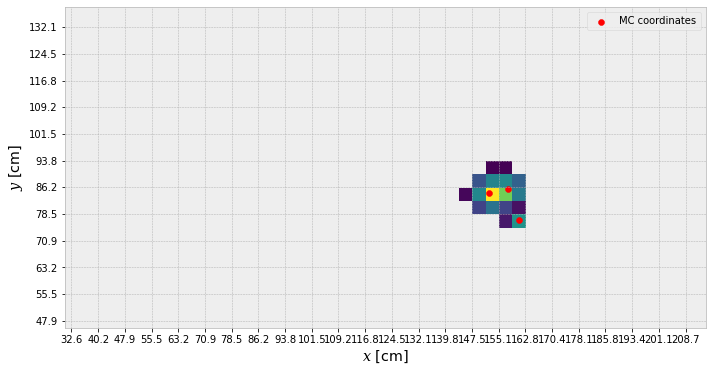

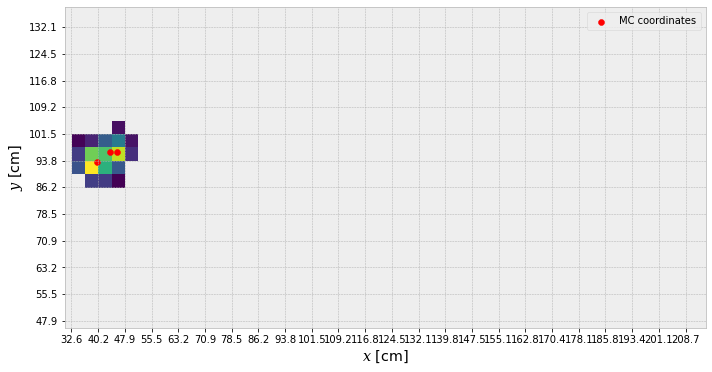

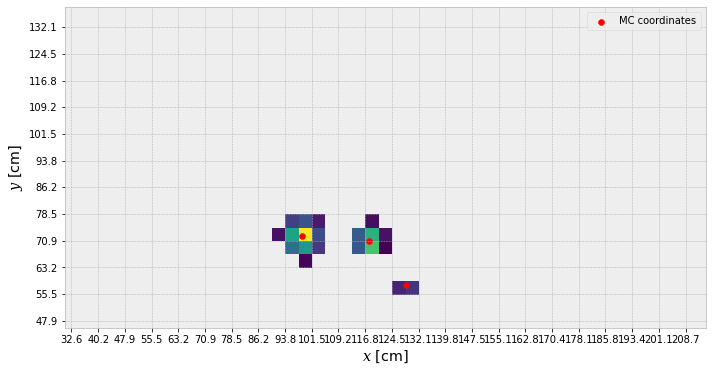

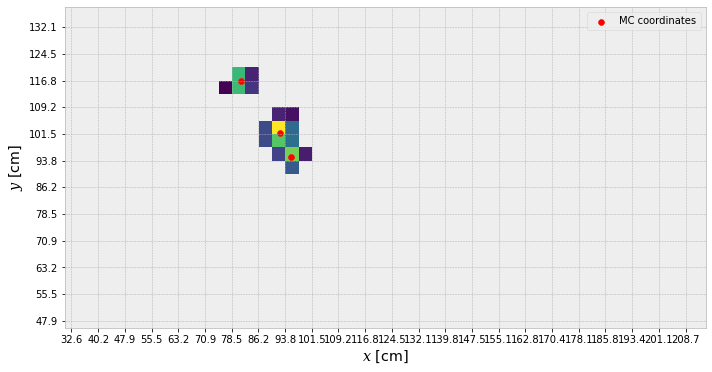

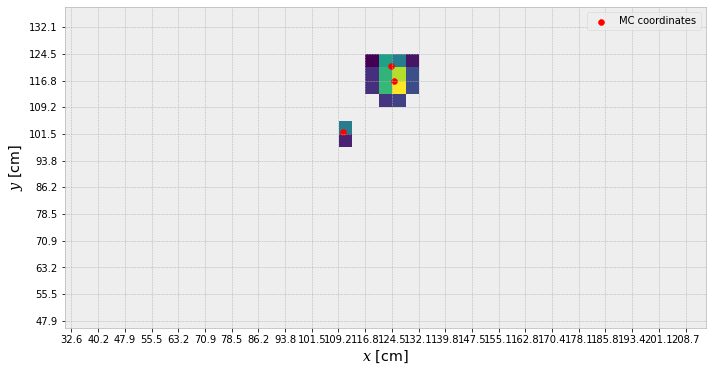

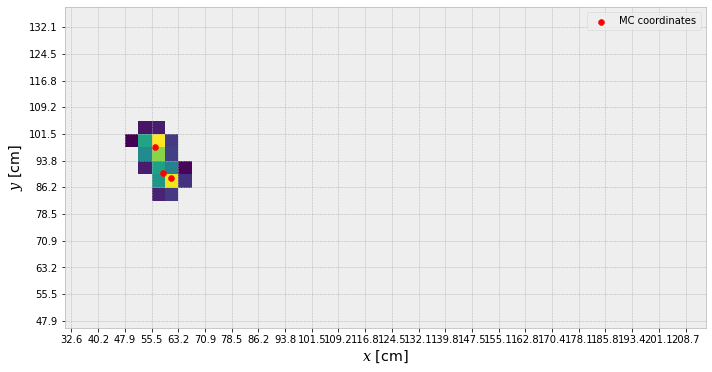

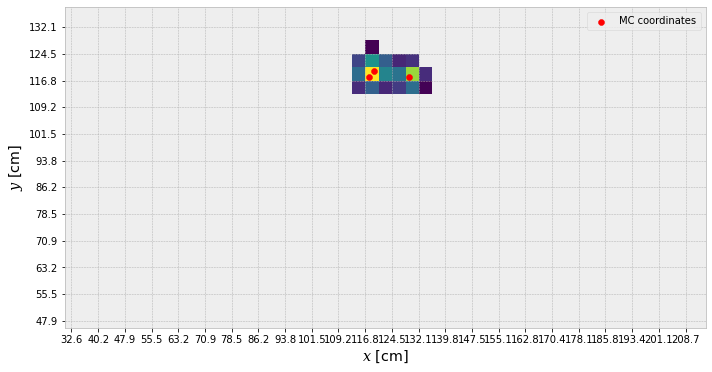

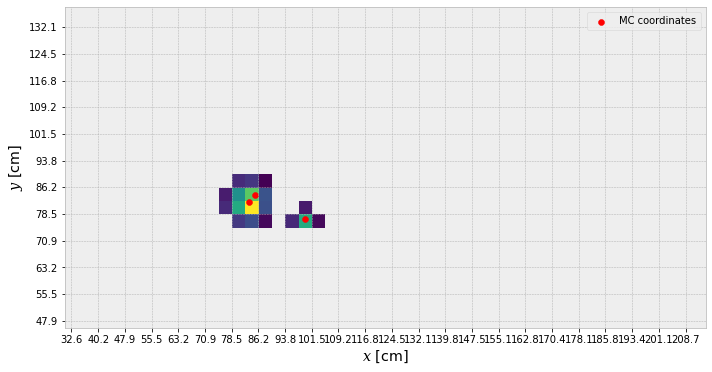

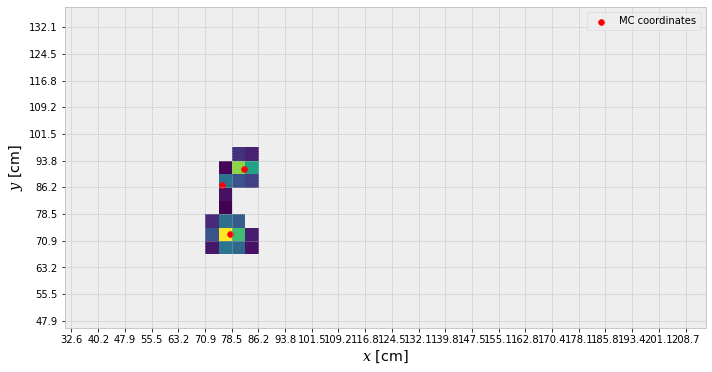

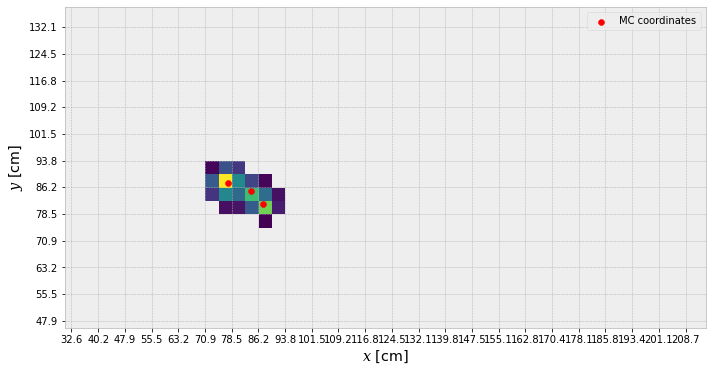

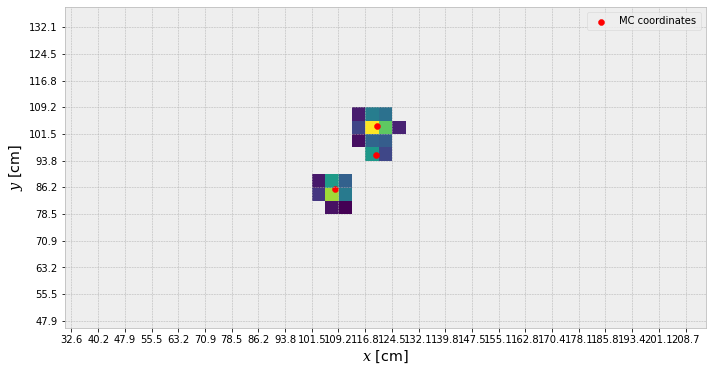

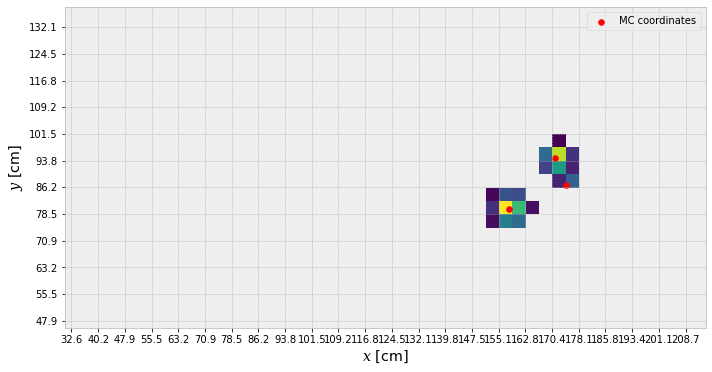

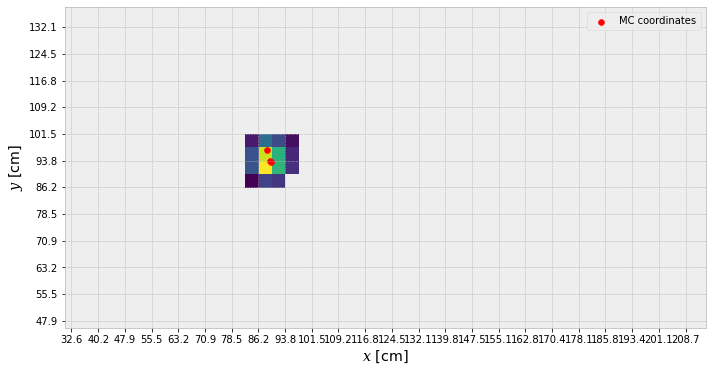

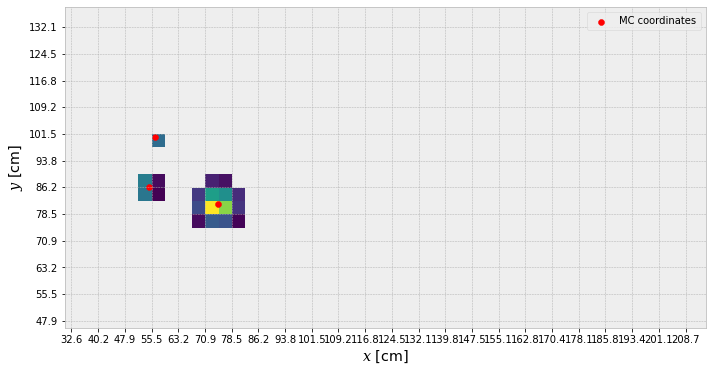

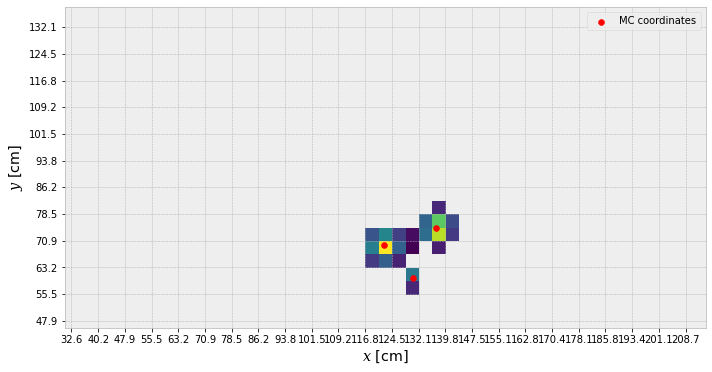

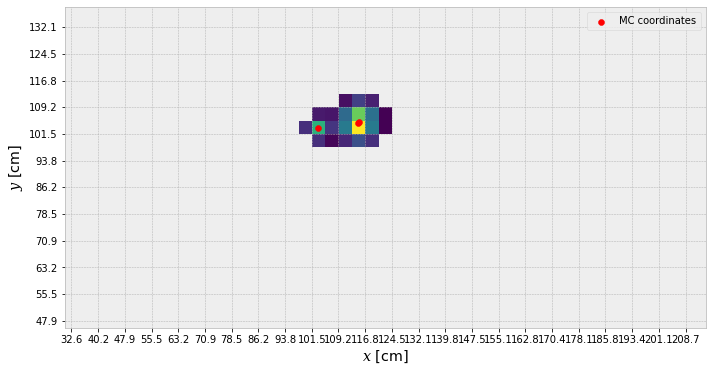

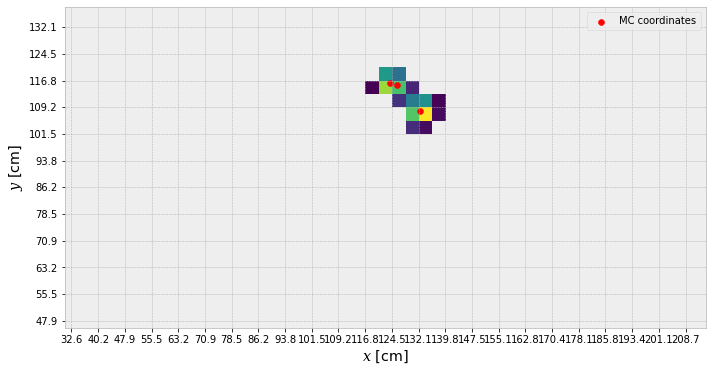

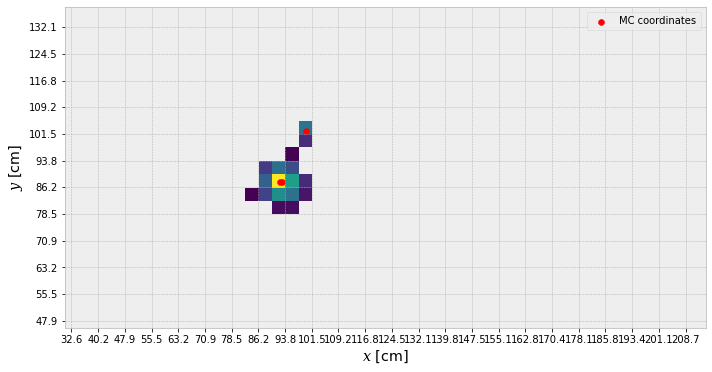

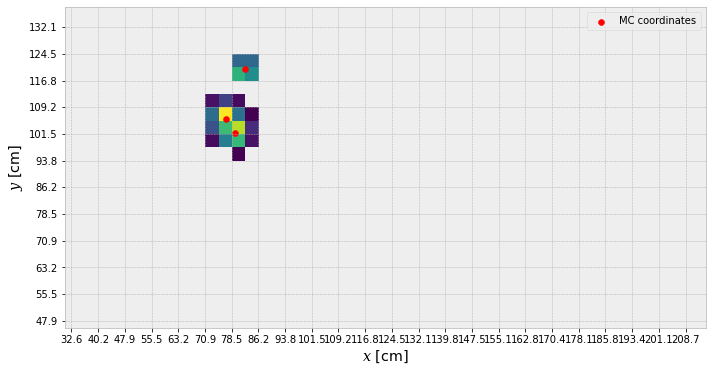

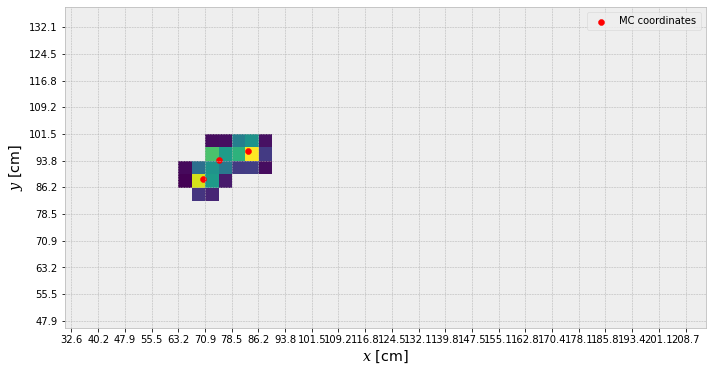

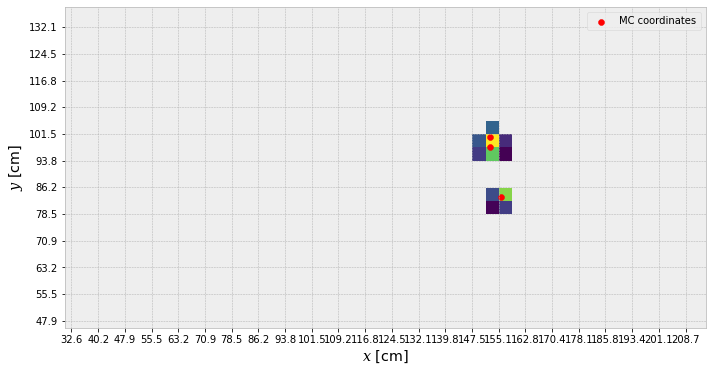

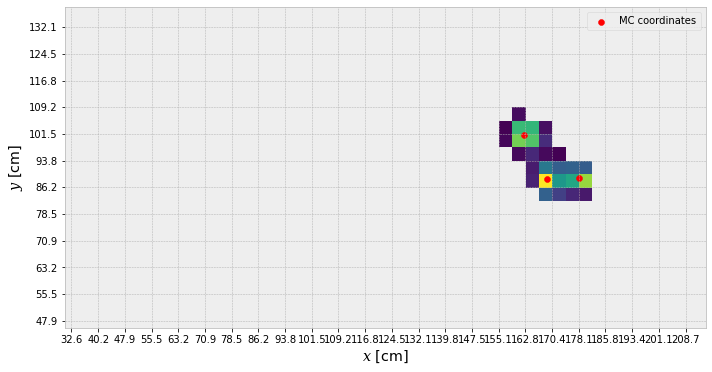

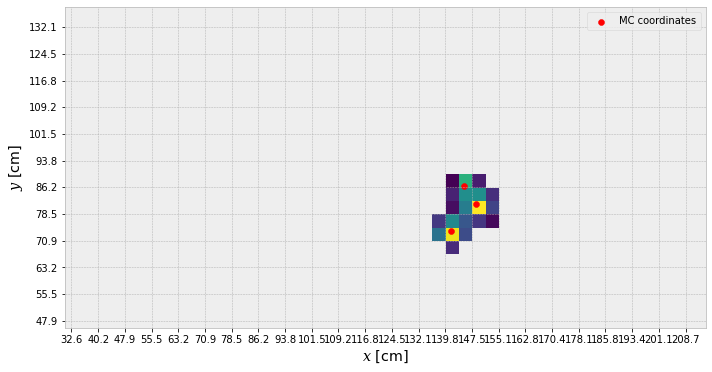

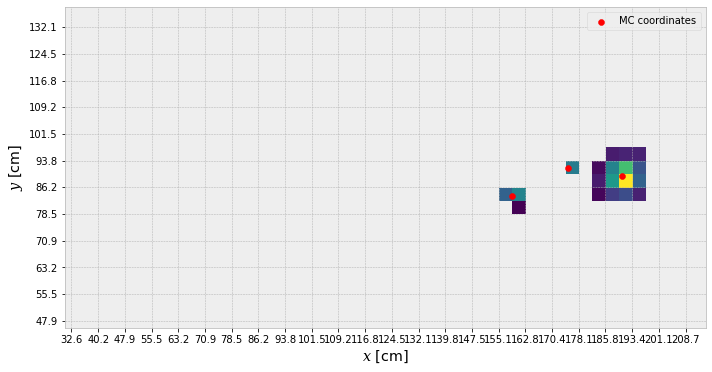

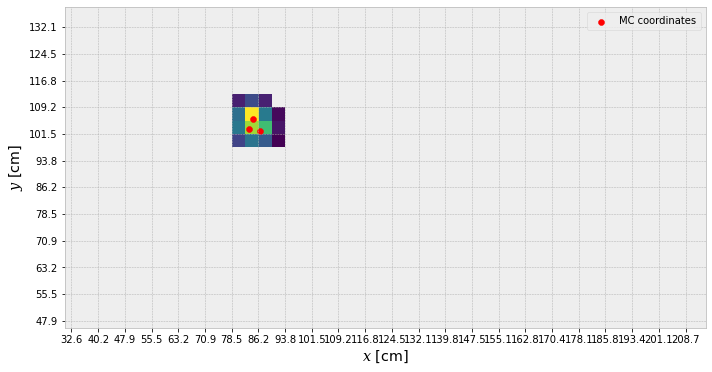

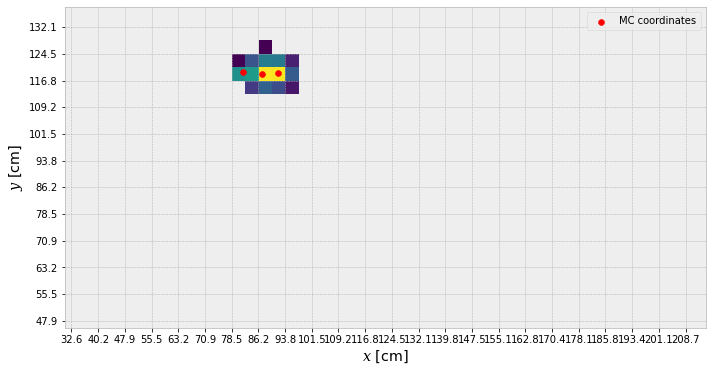

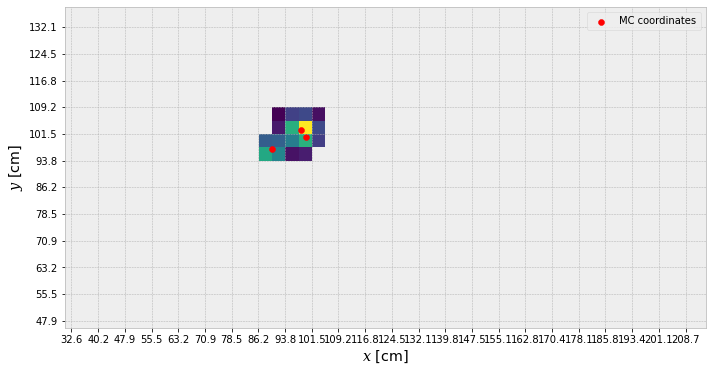

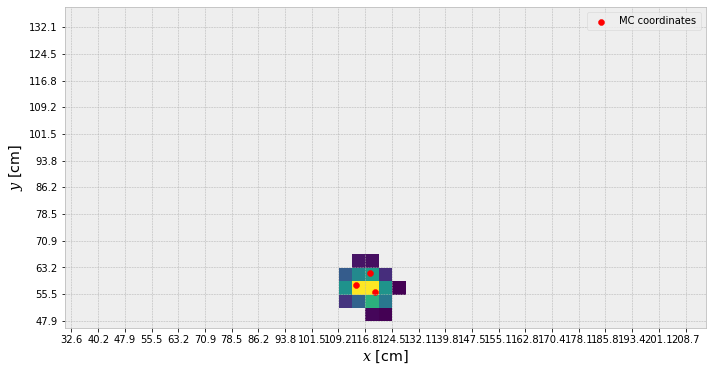

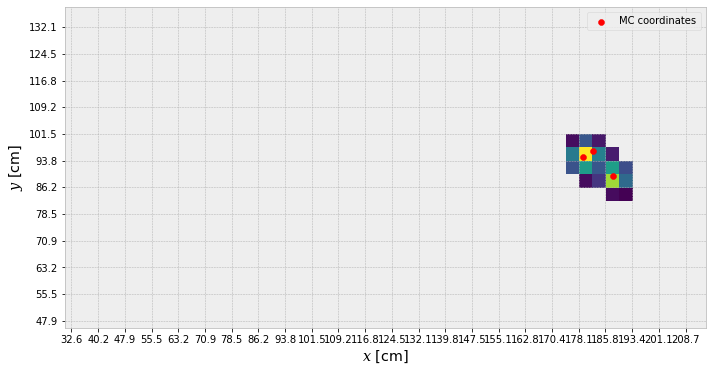

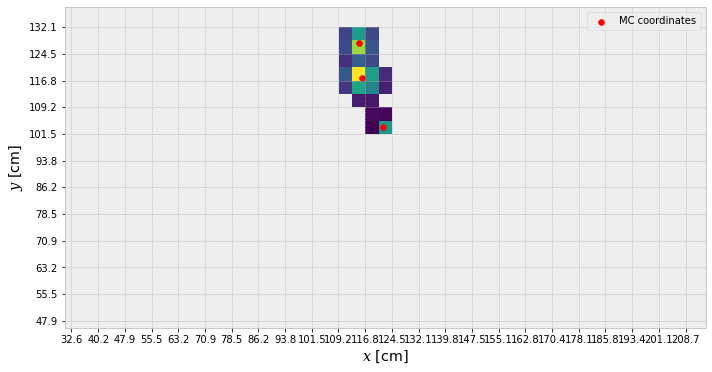

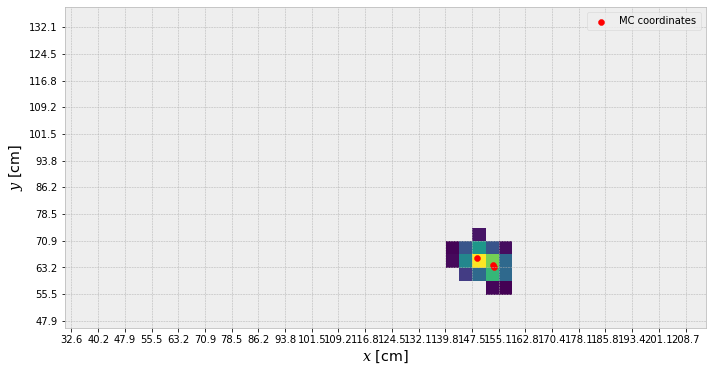

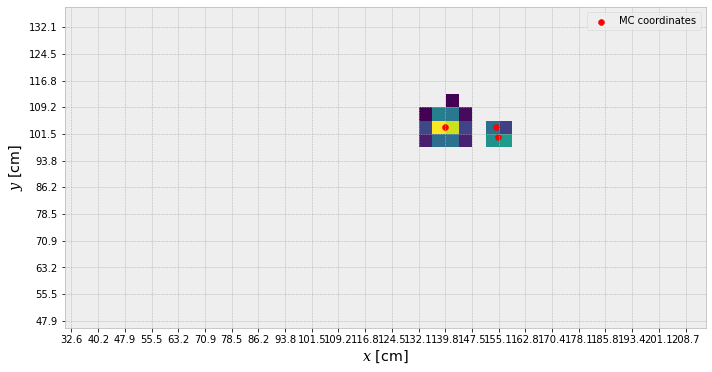

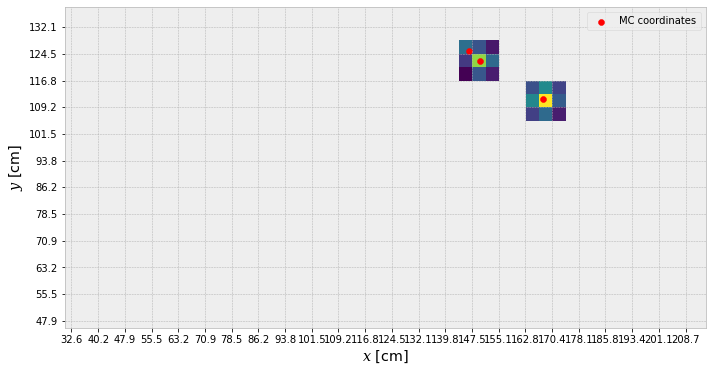

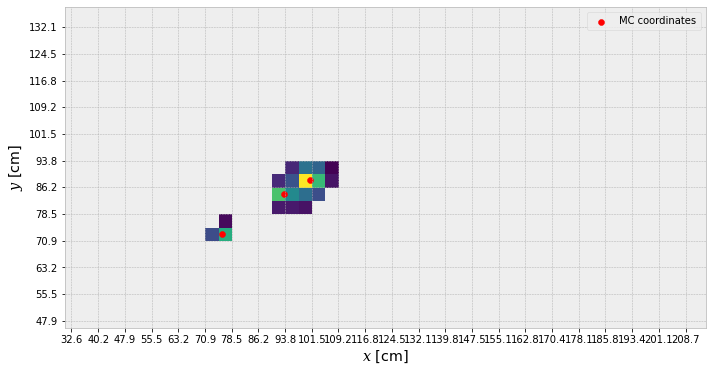

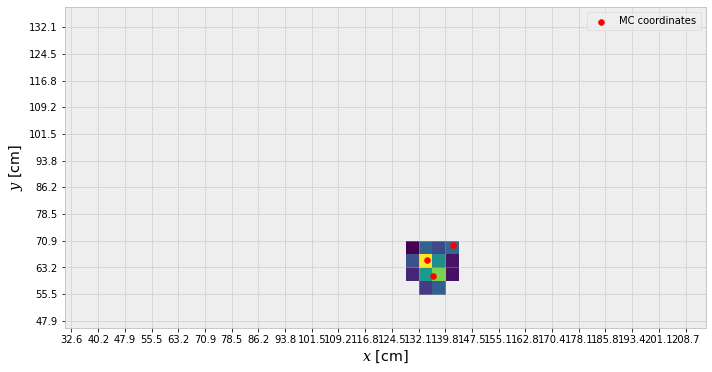

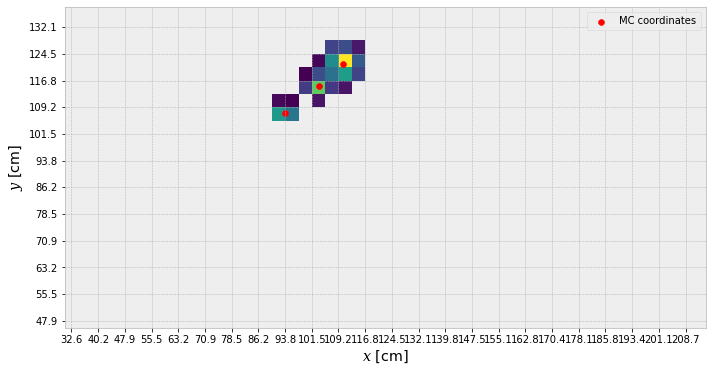

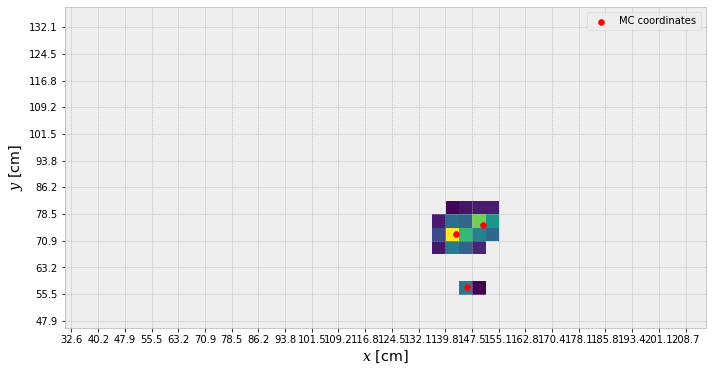

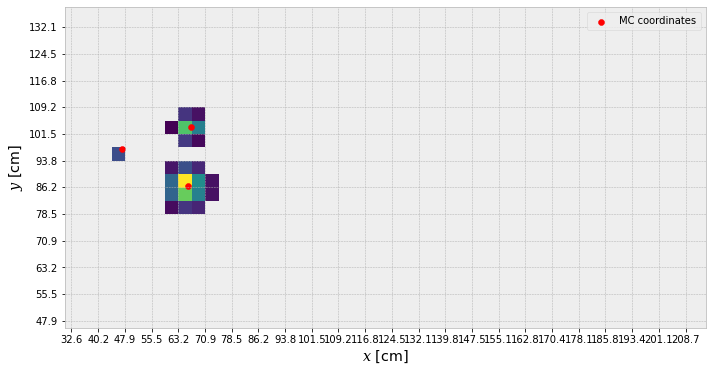

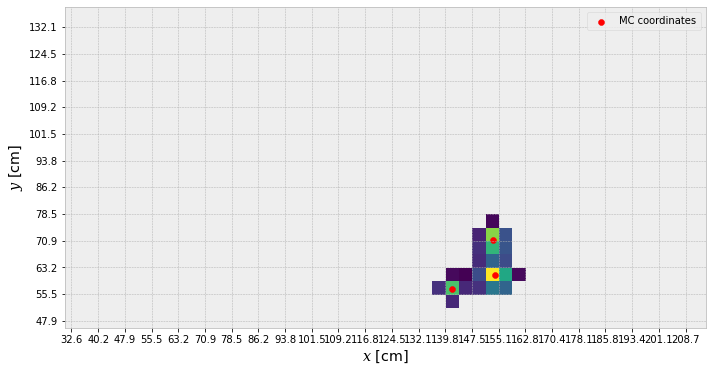

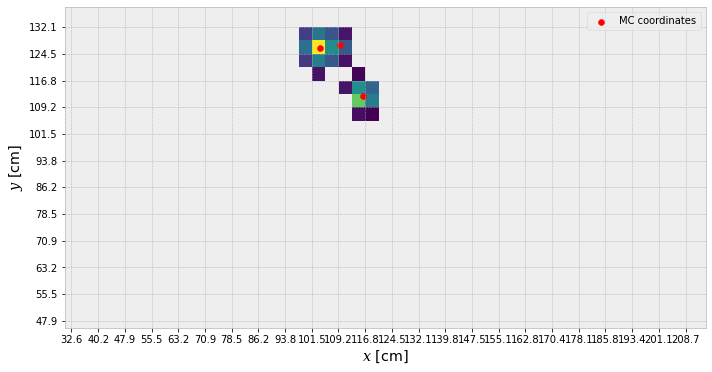

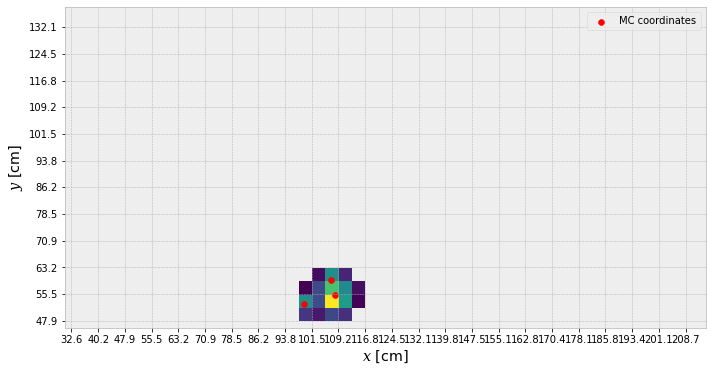

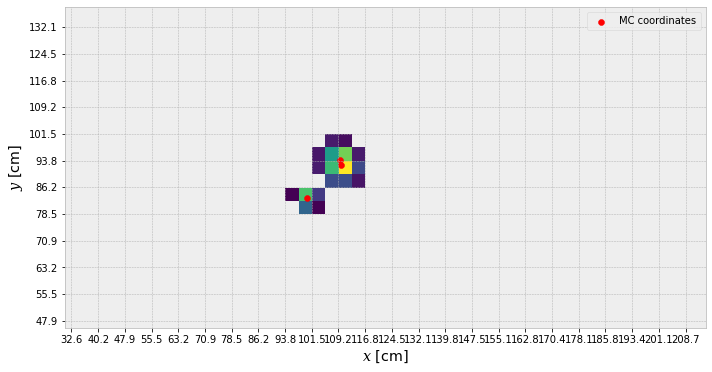

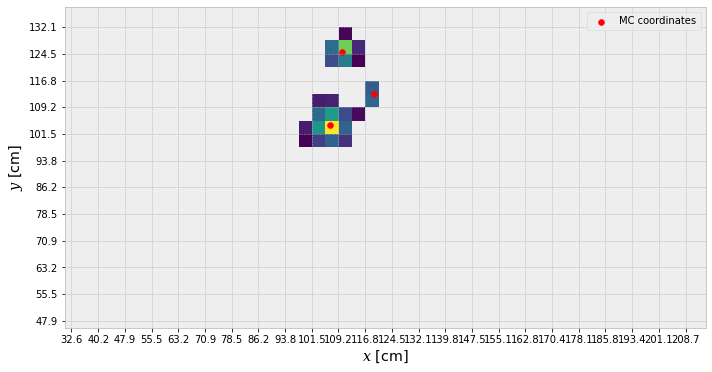

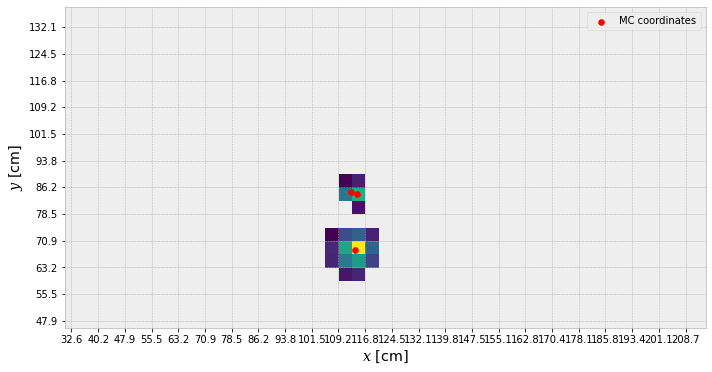

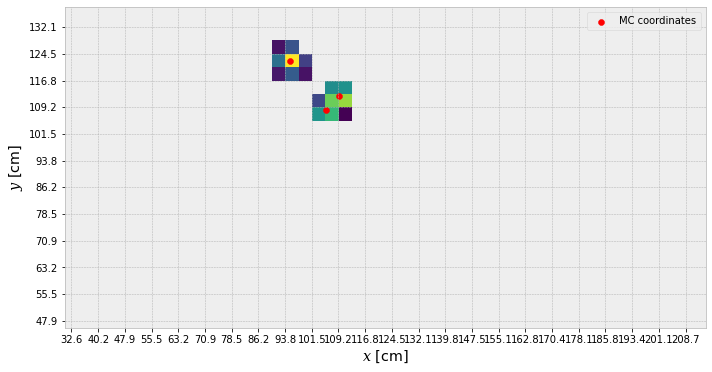

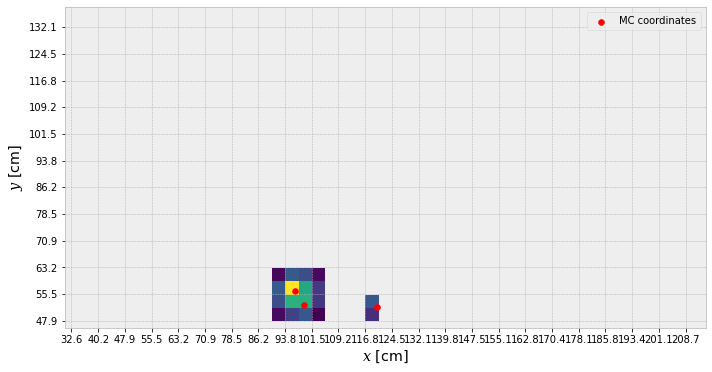

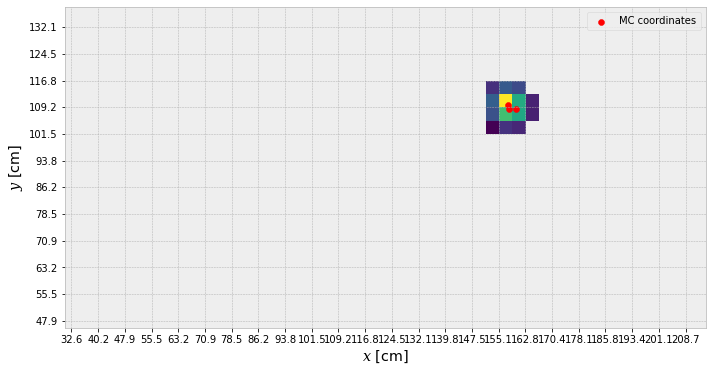

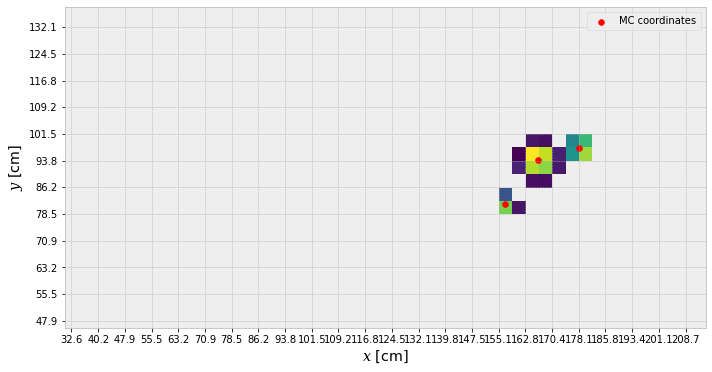

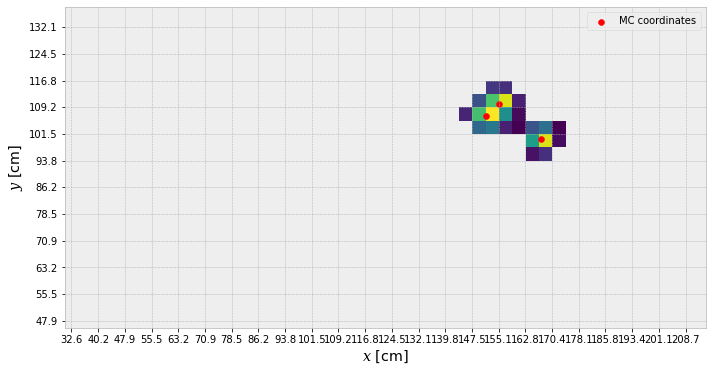

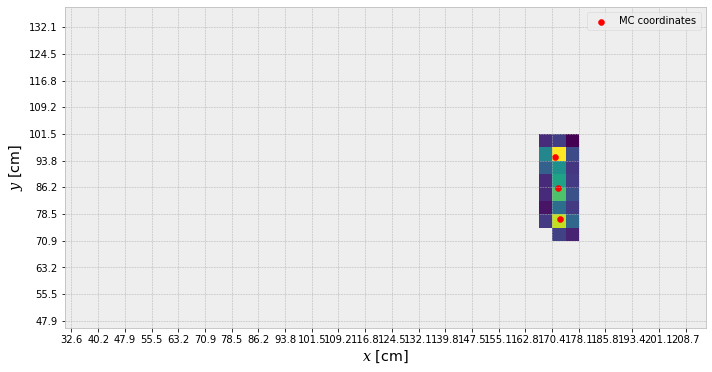

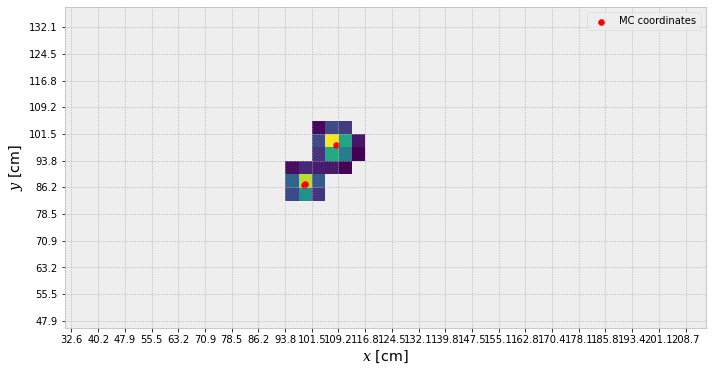

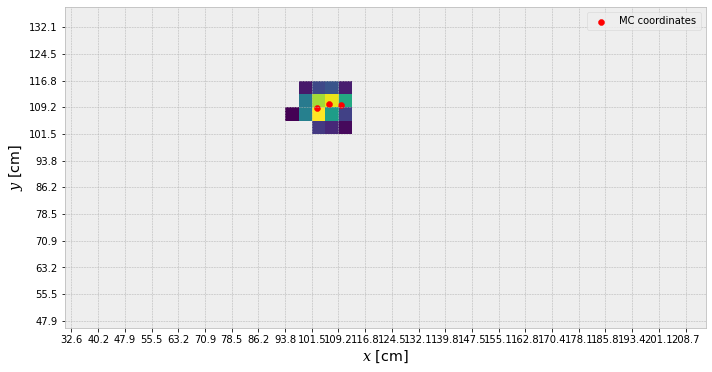

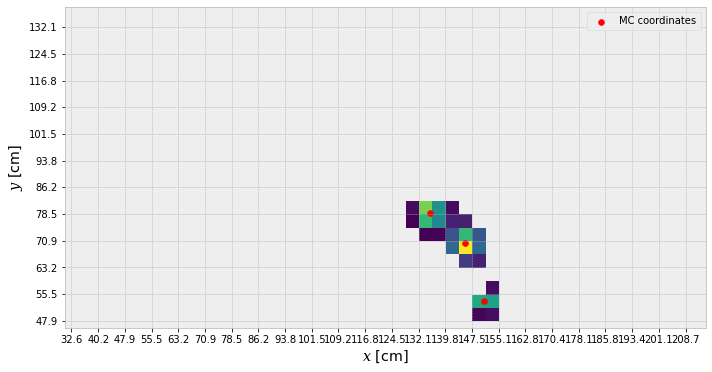

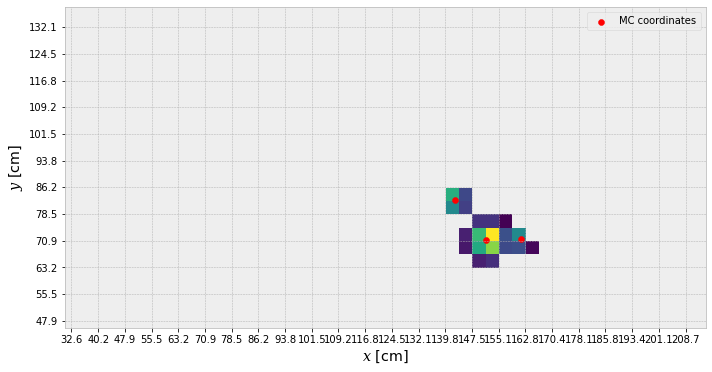

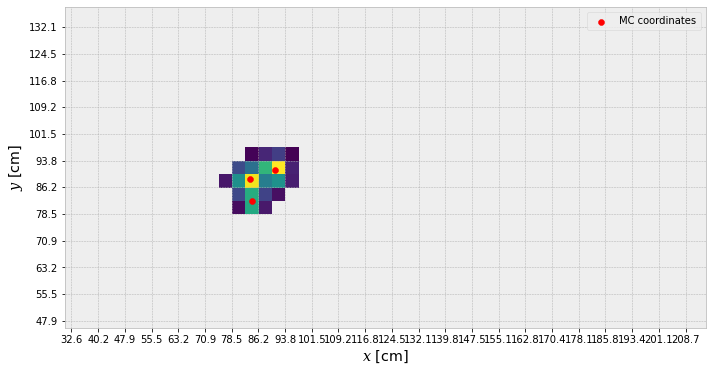

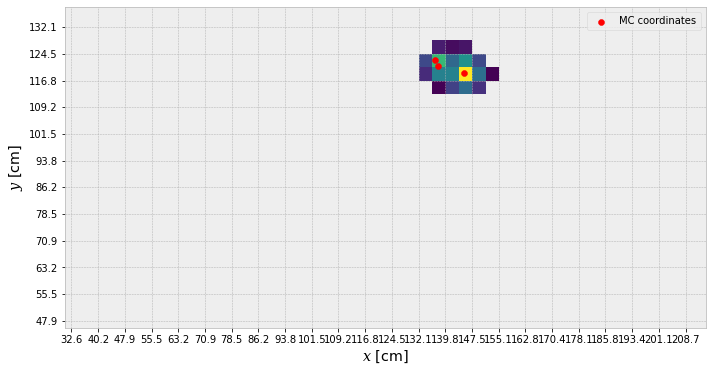

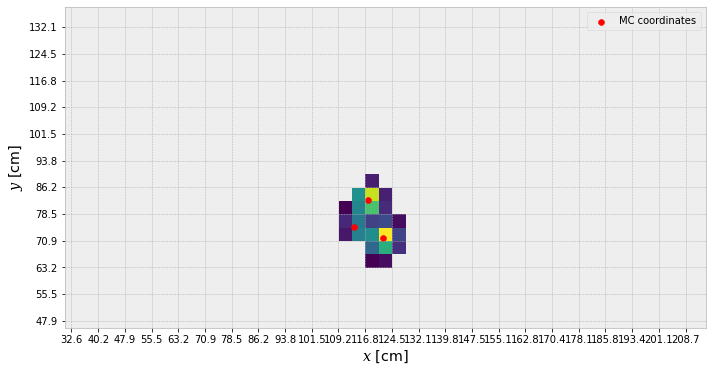

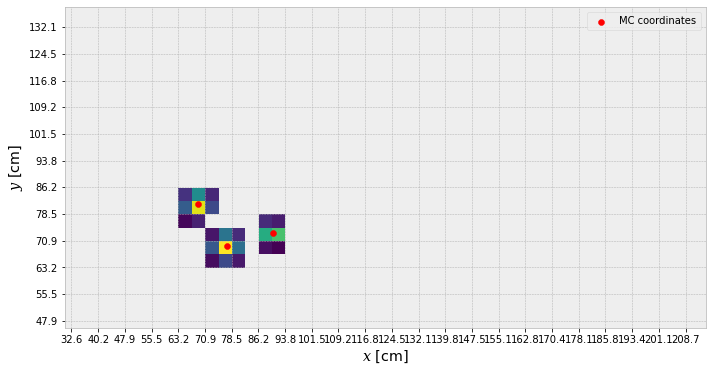

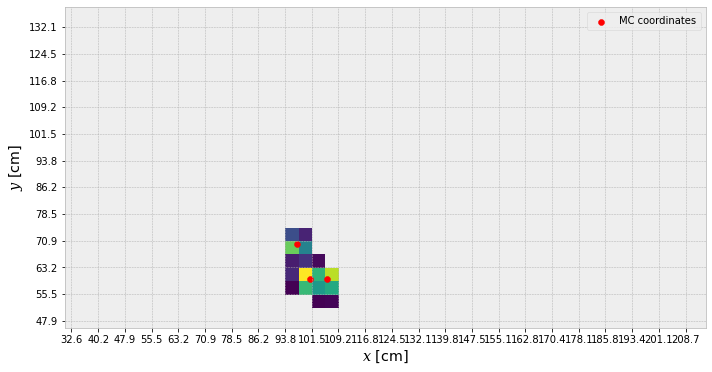

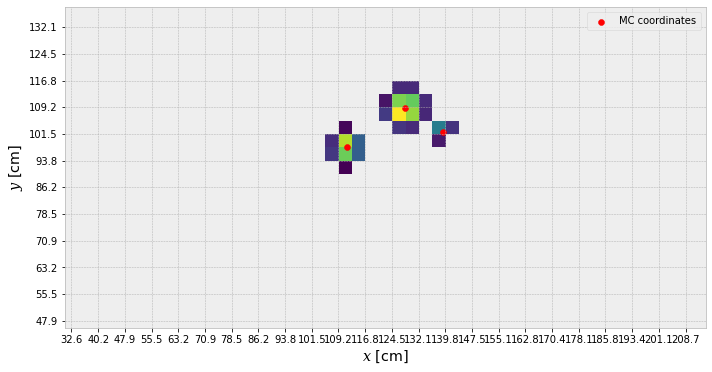

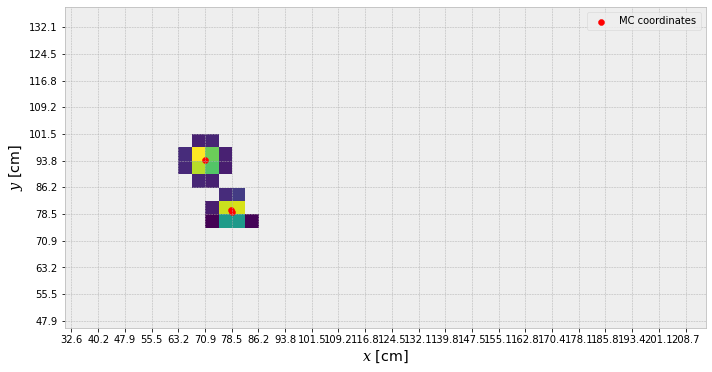

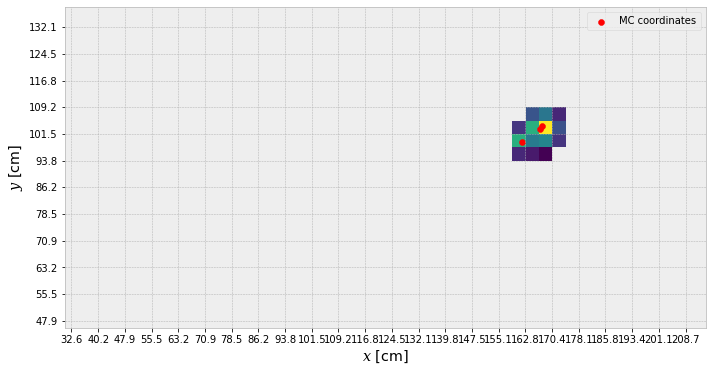

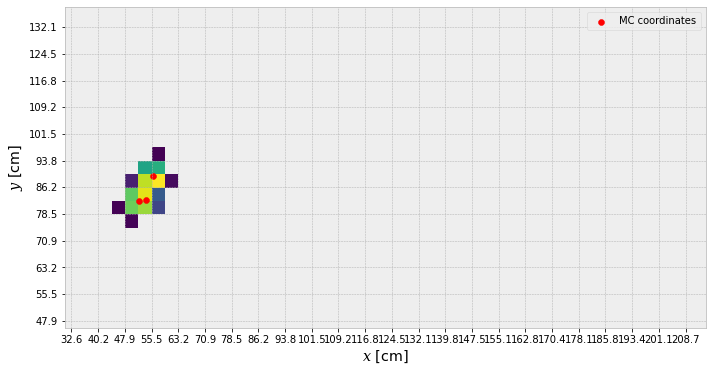

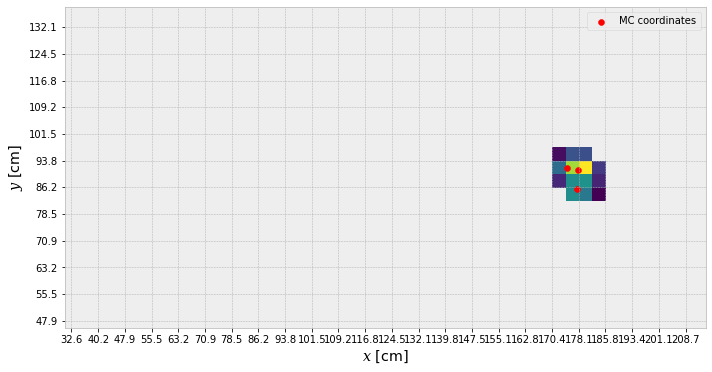

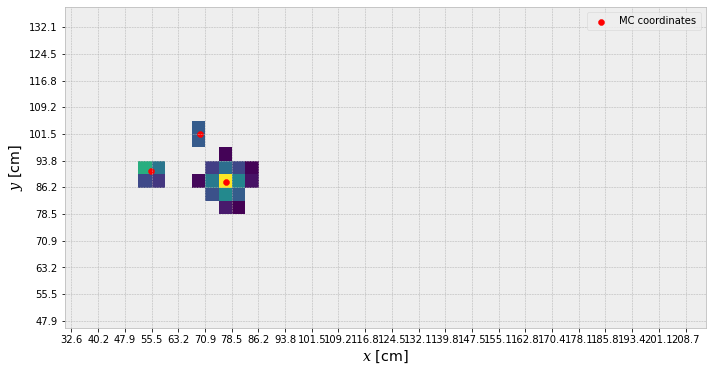

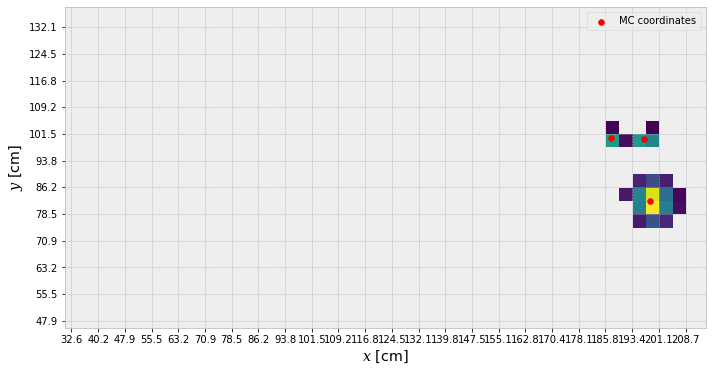

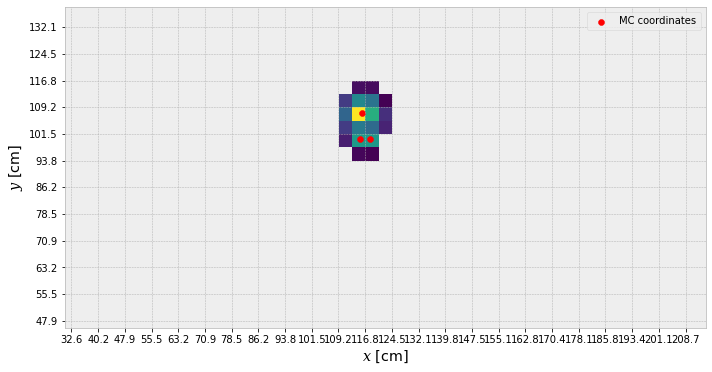

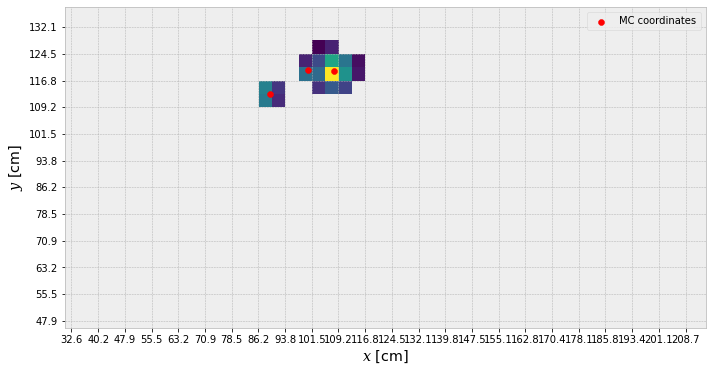

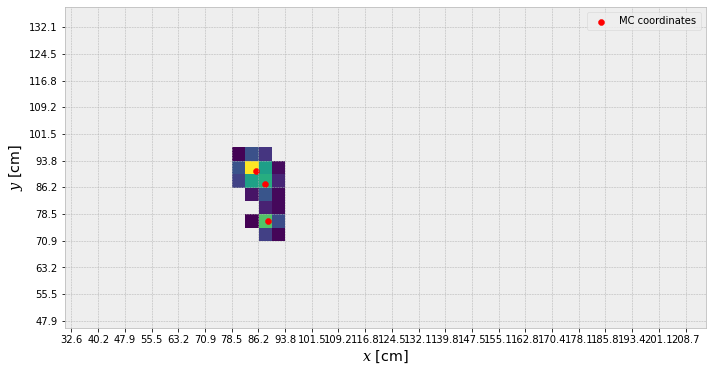

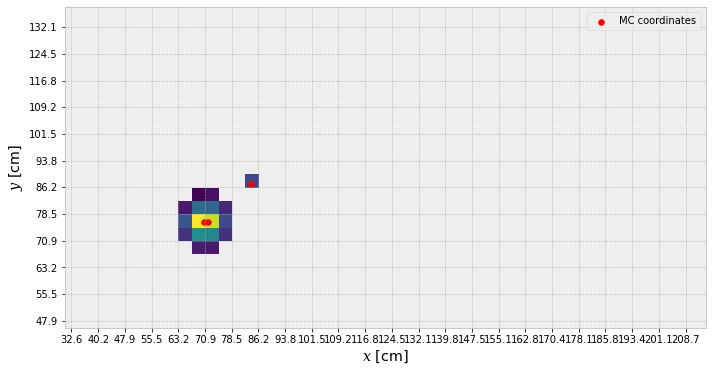

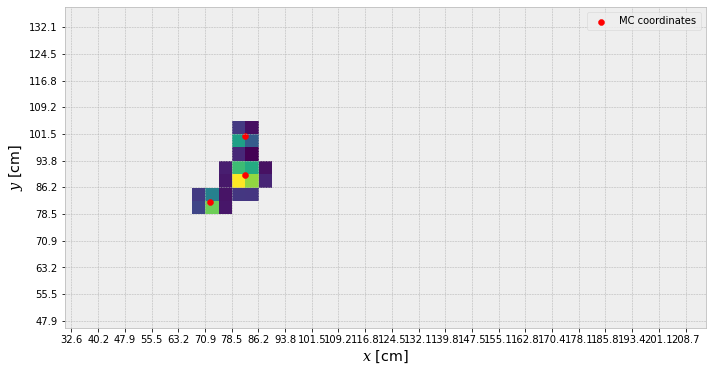

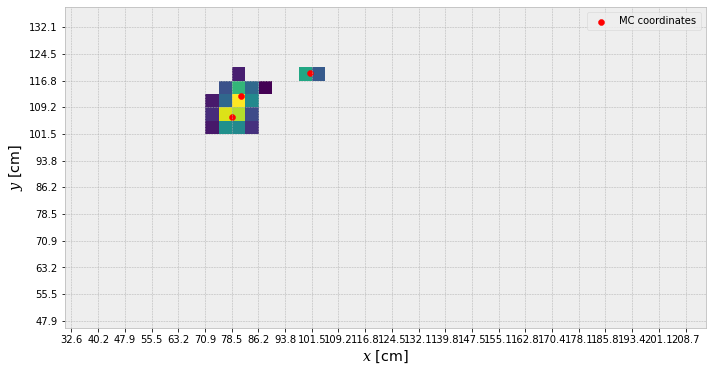

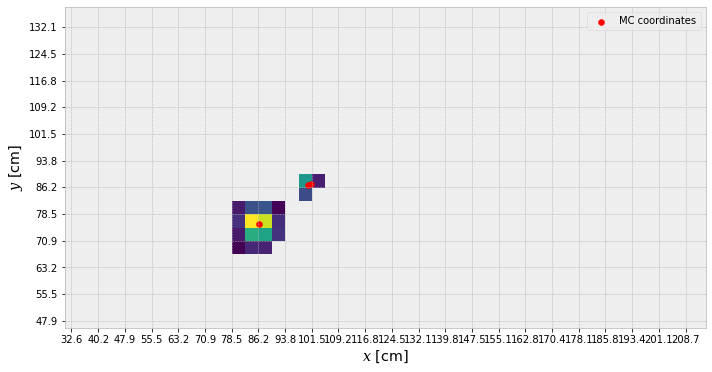

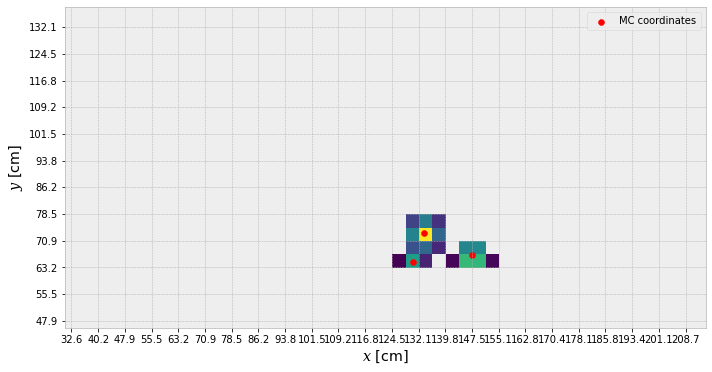

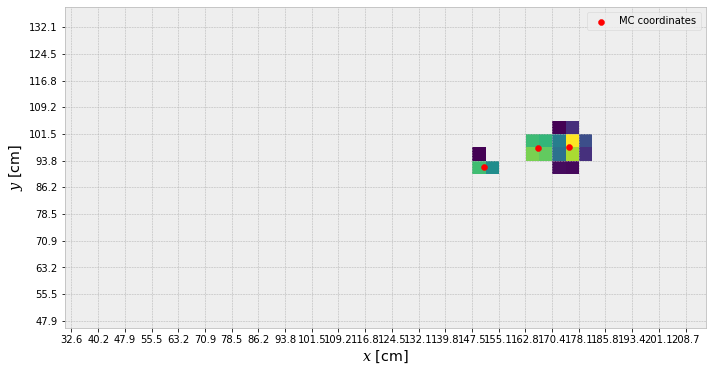

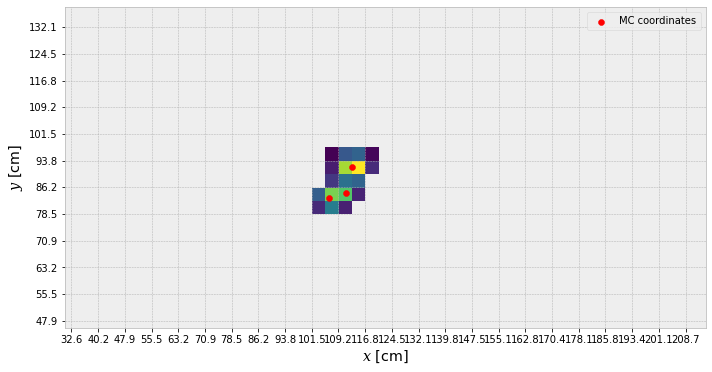

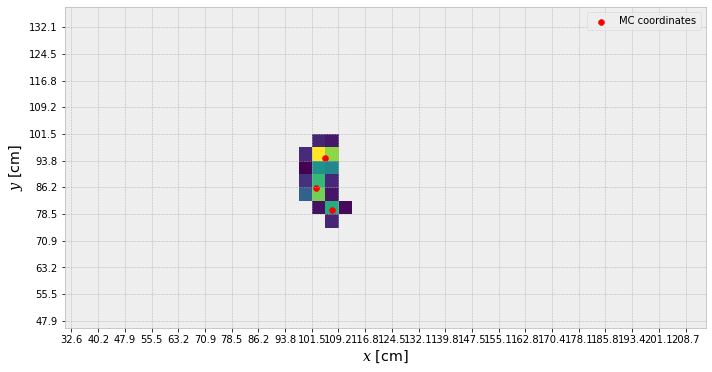

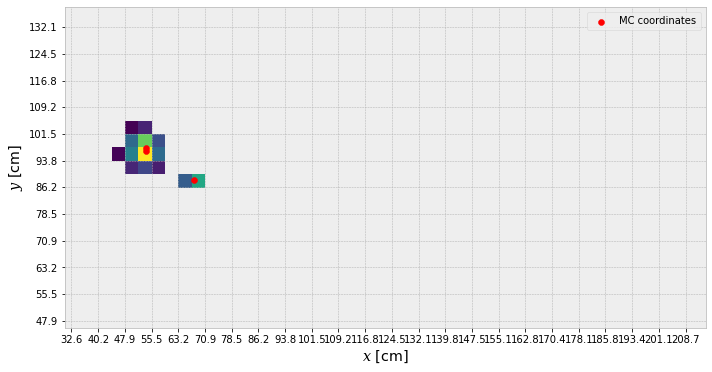

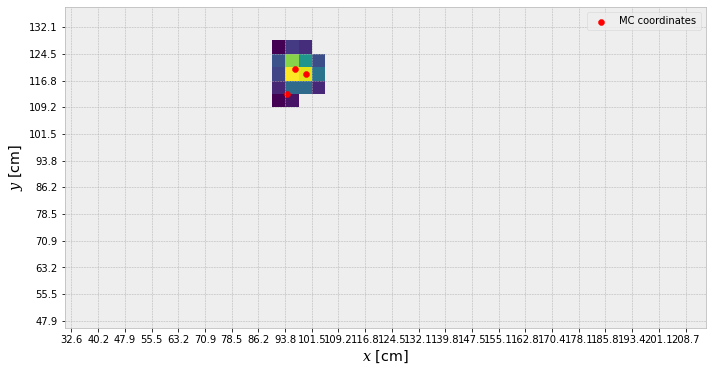

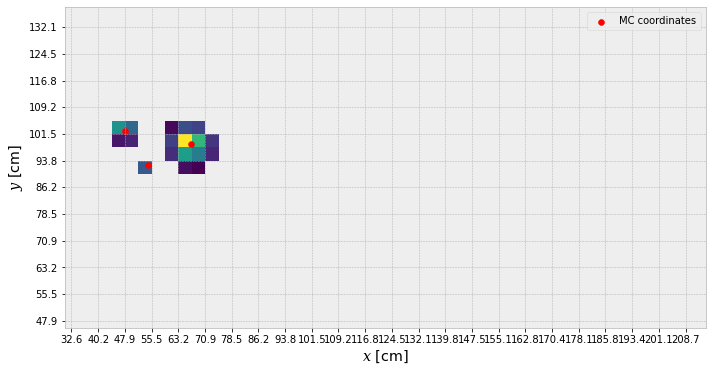

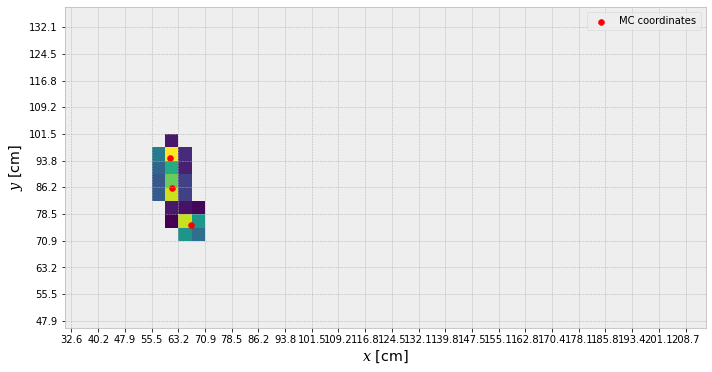

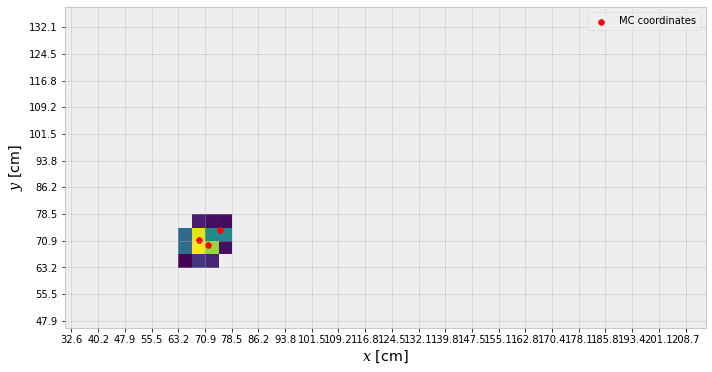

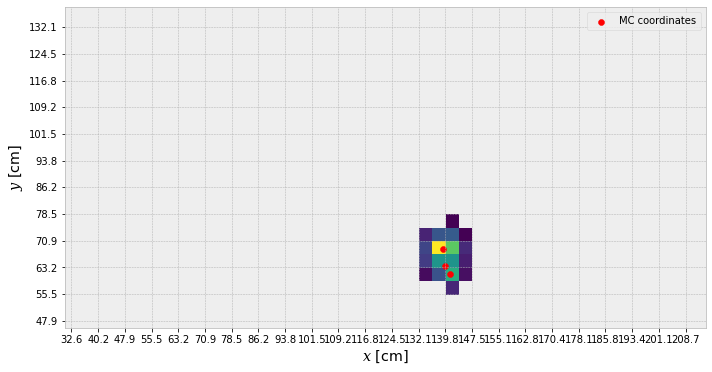

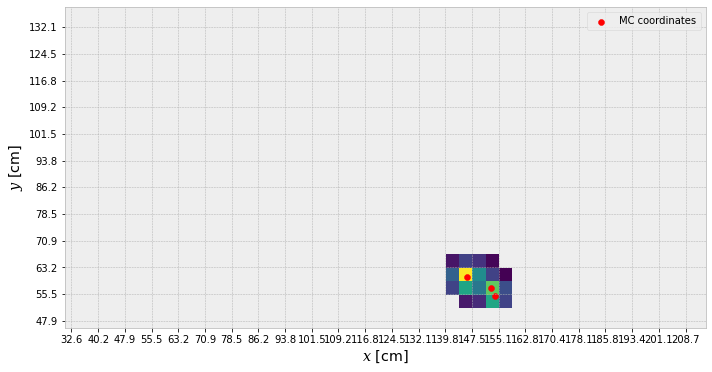

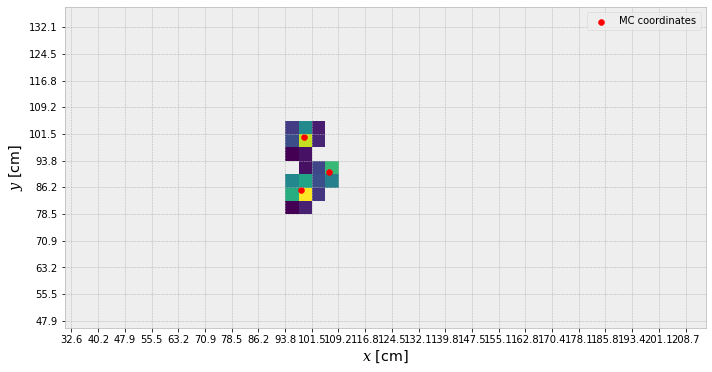

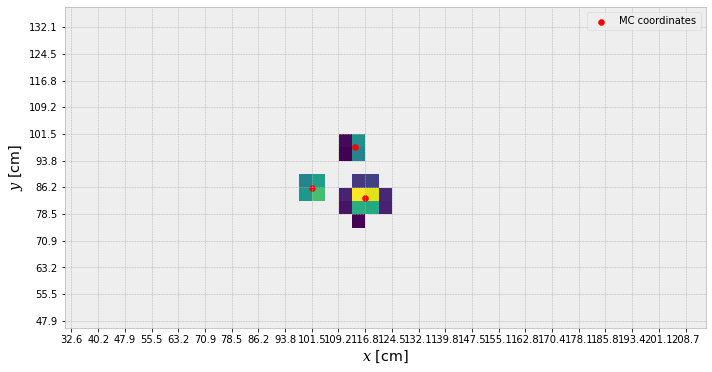

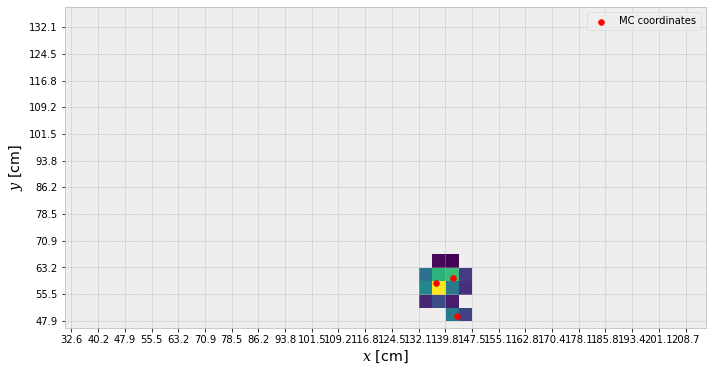

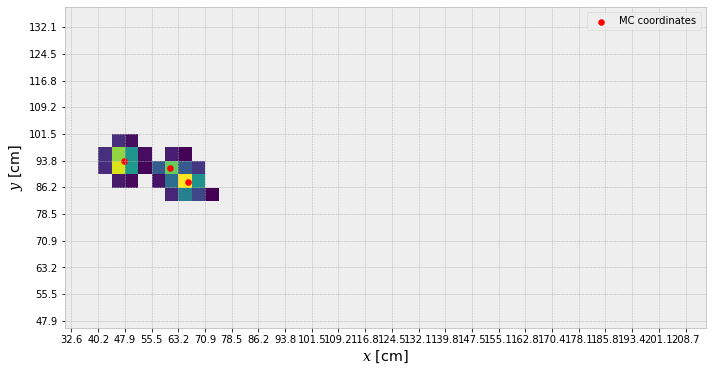

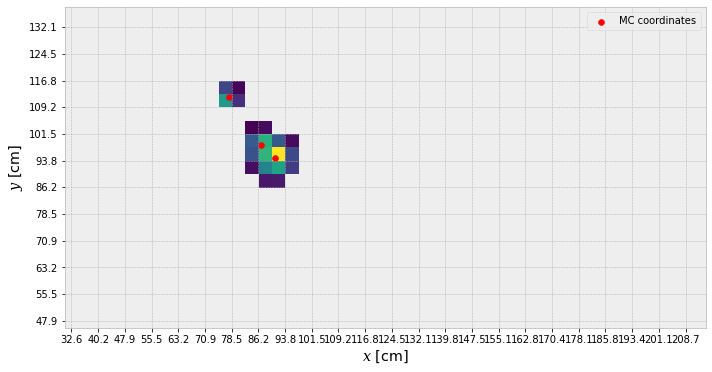

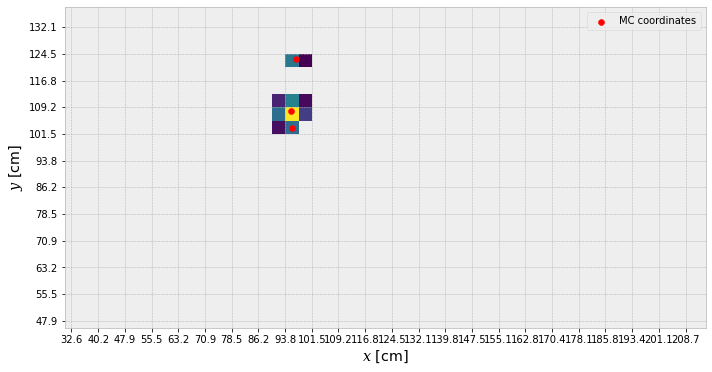

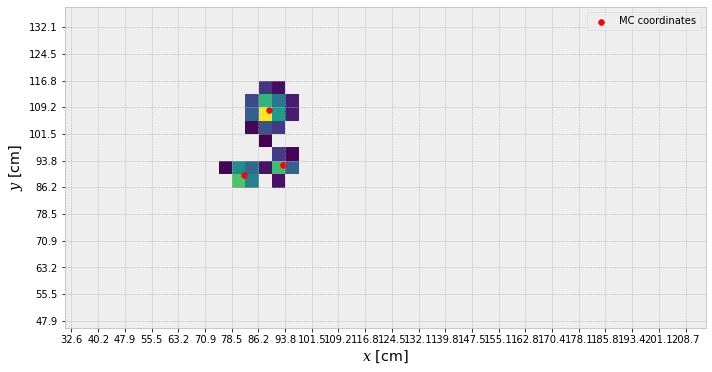

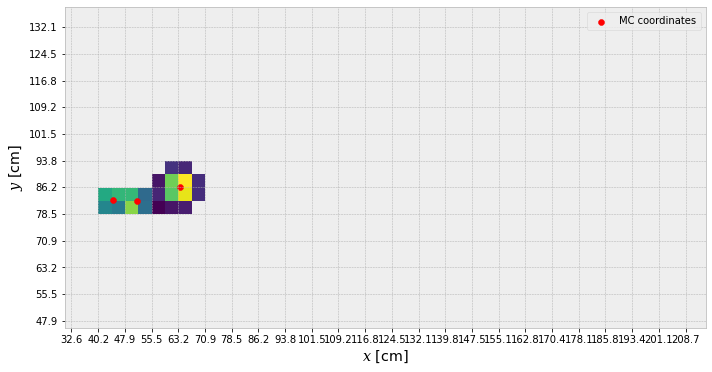

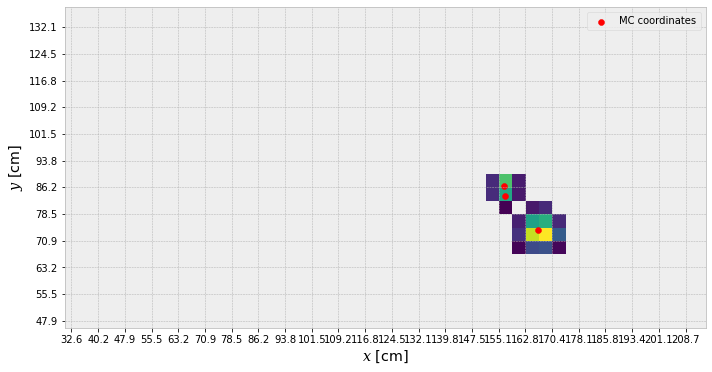

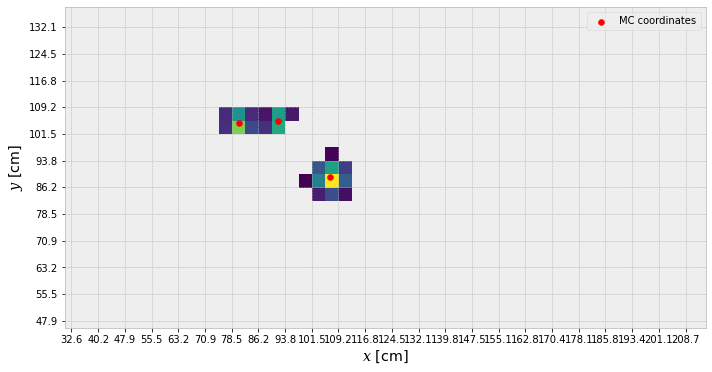

In [5]:
for i in range(100):
    ipd3.show_ecal(i)

<h1> The network!

In [8]:
# load data

num_events = 100000

rootfile1 = uproot.open('./stage5_clusters_1gamma.root')
ipd1 = hf.InputData(rootfile1, 1, numevents=num_events)
ipd1.train_test_split()

rootfile2 = uproot.open('./stage5_clusters_2gamma.root')
ipd2 = hf.InputData(rootfile2, 2, numevents=num_events)
ipd2.train_test_split()

rootfile3 = uproot.open('./stage5_clusters_3gamma.root')
ipd3 = hf.InputData(rootfile3, 3, numevents=num_events)
ipd3.train_test_split()

# prep data
trainings_data = np.concatenate((ipd1.num_photons_t-1, ipd2.num_photons_t-1,  ipd3.num_photons_t-1))
training = hf.one_hot(trainings_data)
data_veri = np.concatenate((ipd1.num_photons_v-1, ipd2.num_photons_v-1, ipd3.num_photons_v-1))

clus = np.concatenate((ipd1.shash_t.reshape(len(ipd1.E_truth_train),25, 49, 1), ipd2.shash_t.reshape(len(ipd2.E_truth_train),25, 49, 1), ipd3.shash_t.reshape(len(ipd3.E_truth_train),25, 49, 1)))
clus_v = np.concatenate((ipd1.shash_v.reshape(len(ipd1.E_truth_veri),25, 49, 1), ipd2.shash_v.reshape(len(ipd2.E_truth_veri),25, 49, 1), ipd3.shash_v.reshape(len(ipd3.E_truth_veri),25, 49, 1)))


Loaded data
Formed cluster
Splitted data into training and test set!
Loaded data
Formed cluster
Splitted data into training and test set!
Loaded data
Formed cluster
Splitted data into training and test set!


NICHT NEU REINLADEN, mit mehr Epochen hat es nur overfittet.

In [6]:
model = keras.models.load_model('./models/model_3photons_simple_2023-04-25')

In [9]:
output = model.predict(clus_v)
ev = hf.Evaluation(output) # create object to help with evaluation


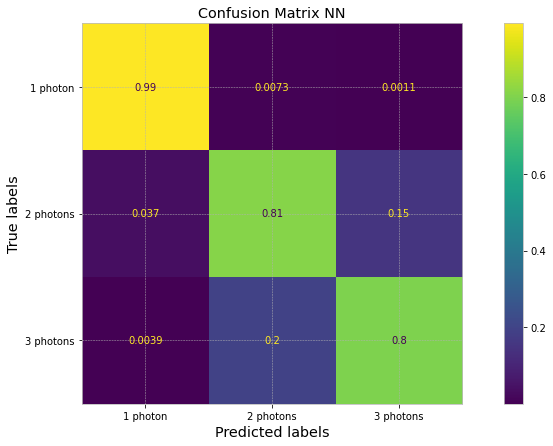

In [12]:
ev.show_confusion_matrix(data_veri, 3, save=False)

In [15]:
data_lednev = np.concatenate((ipd1.num_fit_v-1, ipd2.num_fit_v-1, ipd3.num_fit_v-1))

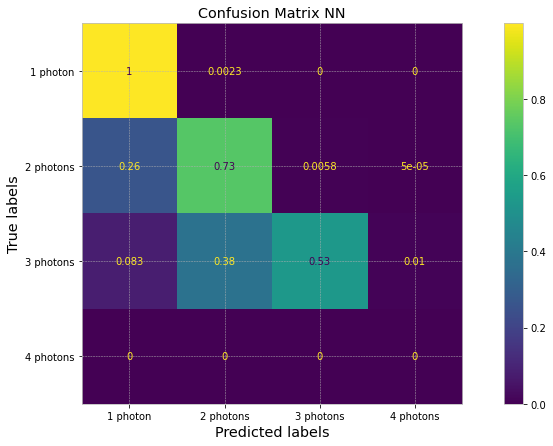

In [16]:
ev.show_confusion_matrix_Lednev(data_veri, data_lednev)

<h2> Let's make some more plots... </h2>

How sure is the network with it's decision?

In [34]:
ind_1gamma = np.where(data_veri==0)
ind_2gamma = np.where(data_veri==1)
ind_3gamma = np.where(data_veri==2)

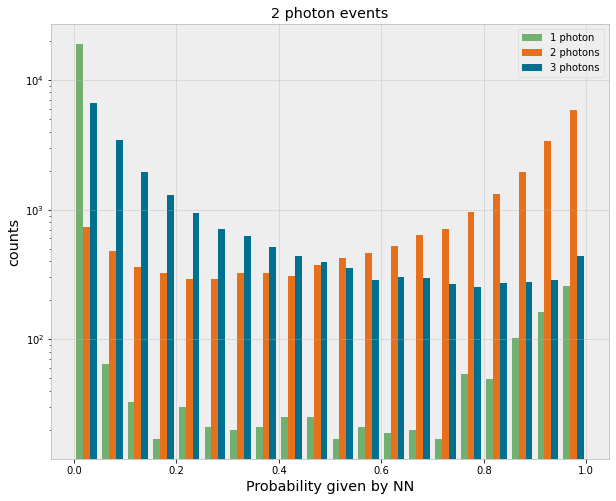

In [30]:
plt.hist(output[ind_2gamma], bins=20, label=['1 photon', '2 photons', '3 photons'])
plt.title("2 photon events")
plt.xlabel("Probability given by NN")
plt.ylabel("counts")
plt.yscale("log")
plt.legend()
plt.show()

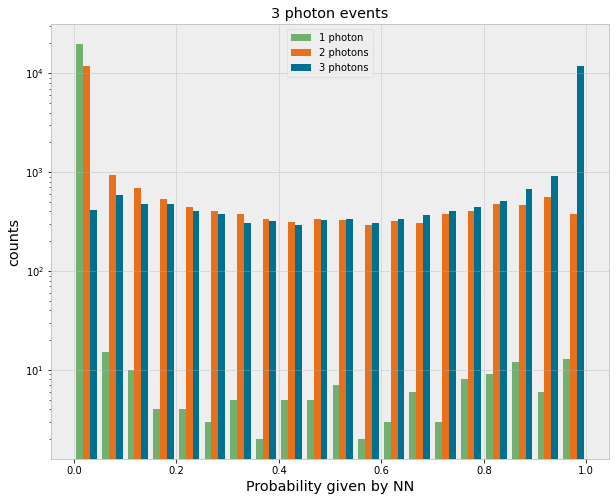

In [33]:
plt.hist(output[ind_3gamma], bins=20, label=['1 photon', '2 photons', '3 photons'])
plt.title("3 photon events")
plt.xlabel("Probability given by NN")
plt.ylabel("counts")
plt.yscale("log")
plt.legend()
plt.show()

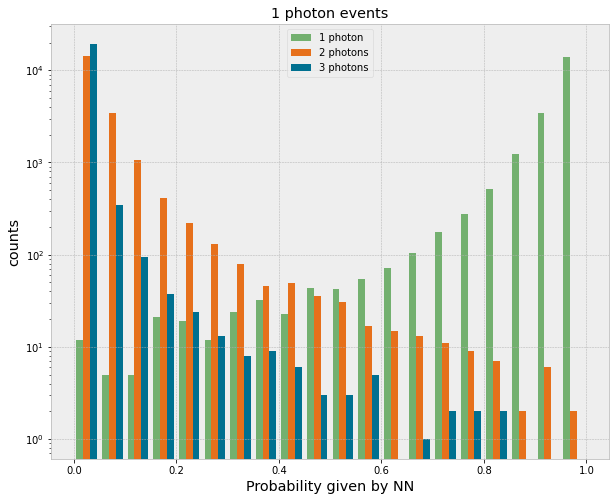

In [35]:
plt.hist(output[ind_1gamma], bins=20, label=['1 photon', '2 photons', '3 photons'])
plt.title("1 photon events")
plt.xlabel("Probability given by NN")
plt.ylabel("counts")
plt.yscale("log")
plt.legend()
plt.show()

Ok together:

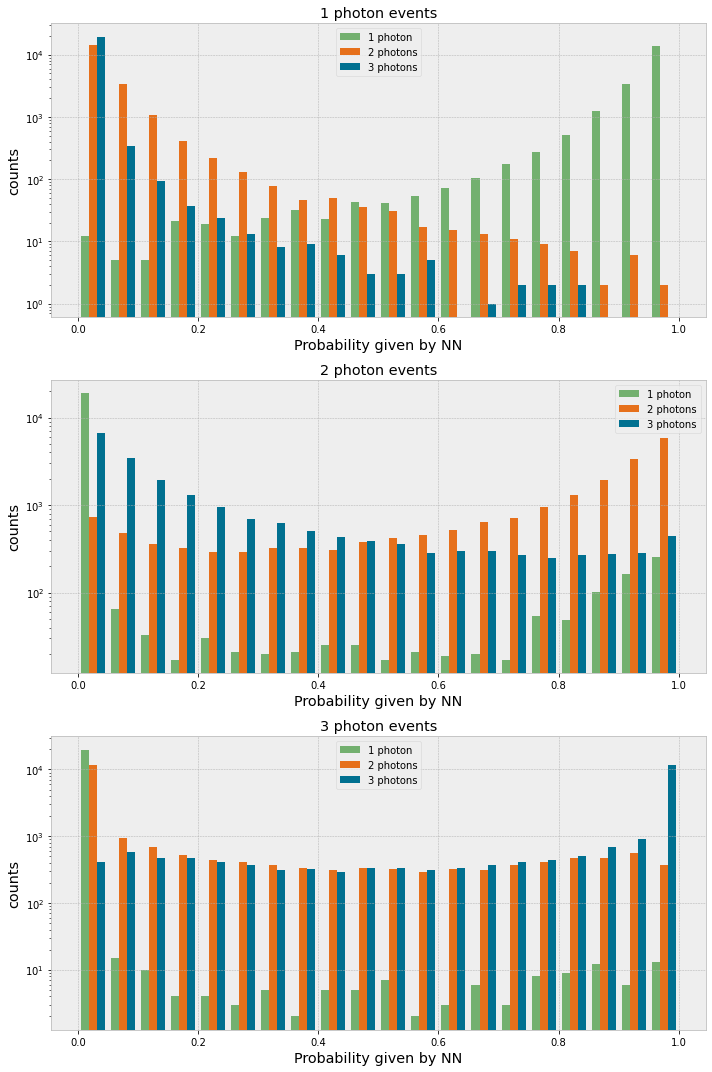

In [40]:
plt.rcParams["figure.figsize"] = (10, 15)

plt.subplot(3,1,1)
plt.hist(output[ind_1gamma], bins=20, label=['1 photon', '2 photons', '3 photons'])
plt.title("1 photon events")
plt.xlabel("Probability given by NN")
plt.ylabel("counts")
plt.yscale("log")
plt.legend()

plt.subplot(3,1,2)
plt.hist(output[ind_2gamma], bins=20, label=['1 photon', '2 photons', '3 photons'])
plt.title("2 photon events")
plt.xlabel("Probability given by NN")
plt.ylabel("counts")
plt.yscale("log")
plt.legend()

plt.subplot(3,1,3)
plt.hist(output[ind_3gamma], bins=20, label=['1 photon', '2 photons', '3 photons'])
plt.title("3 photon events")
plt.xlabel("Probability given by NN")
plt.ylabel("counts")
plt.yscale("log")
plt.legend()

plt.tight_layout()
plt.show()

In [45]:
ind_bad3_1 = np.where(data_veri==2)
ind_bad3_2 = np.where(output.T[2]<0.85)
ind_bad3 = np.intersect1d(ind_bad3_1, ind_bad3_2 )s
